KMeans Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
dt= pd.read_csv('Mall_Customers - Mall_Customers.csv')
features = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
missing_values = dt.isnull().sum()
total_missing = missing_values.sum()
print(f"Total missing values: {total_missing}")
dt

Total missing values: 3


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40
...,...,...,...,...,...
198,199,Male,32.0,137.0,18
199,200,Male,30.0,137.0,83
200,201,Female,27.0,NaN,28
201,202,Male,NaN,137.0,19


In [3]:
dt['Age'].fillna(dt['Age'].mean(), inplace=True)
dt['Annual Income (k$)'].fillna(dt['Annual Income (k$)'].mean(), inplace=True)
dt

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.000000,15.000000,39
1,2,Male,21.000000,15.000000,81
2,3,Female,20.000000,16.000000,6
3,4,Female,23.000000,16.000000,77
4,5,Female,31.000000,17.000000,40
...,...,...,...,...,...
198,199,Male,32.000000,137.000000,18
199,200,Male,30.000000,137.000000,83
200,201,Female,27.000000,61.316832,28
201,202,Male,38.747525,137.000000,19


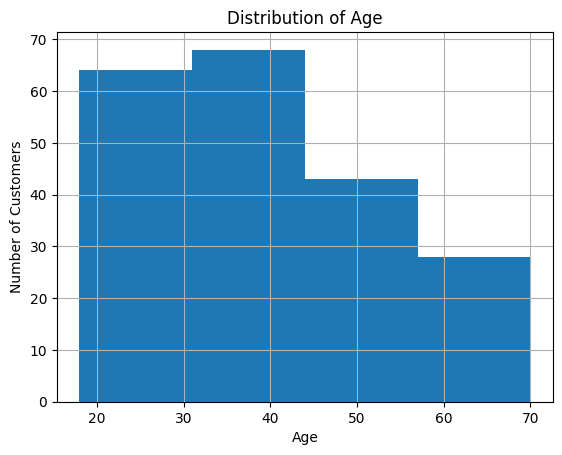

In [4]:
le = LabelEncoder()
dt['Gender'] = le.fit_transform(dt['Gender'])
dt['Age'].hist(bins=4)
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Age')
plt.show()

In [5]:
num=dt.select_dtypes(include=('number'))
corr = num.corr()
highest_corr_feature = corr['Spending Score (1-100)'].drop('Spending Score (1-100)').idxmax()
print(f"Feature with highest correlation: {highest_corr_feature}")

Feature with highest correlation: Annual Income (k$)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

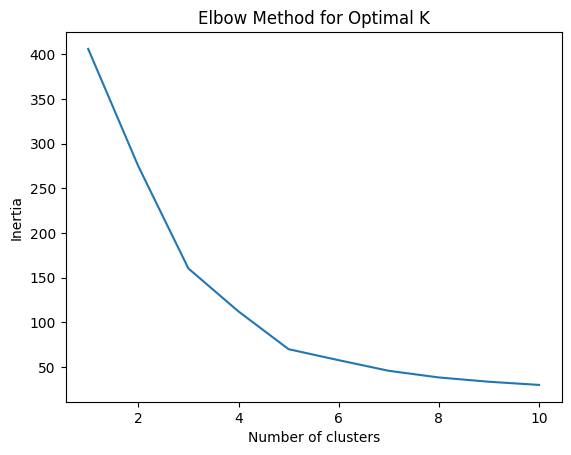

In [6]:
scal= StandardScaler()
sccaled=scal.fit_transform(dt[['Annual Income (k$)','Spending Score (1-100)' ]])
a = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sccaled)
    a.append(kmeans.inertia_)
plt.plot(range(1, 11), a)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [8]:
avg_income = dt['Annual Income (k$)'].mean()
print(f"Average Annual Income: {avg_income:.2f}")

Average Annual Income: 61.32


In [9]:
male_dt = dt[dt['Gender'] == le.transform(['Male'])[0]]
avg_score_male = male_dt['Spending Score (1-100)'].mean()
print(f"Average Male Spending Score: {avg_score_male:.2f}")

Average Male Spending Score: 48.18


In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dt[features])
dt['Cluster'] = kmeans.labels_
cluster_incomes = dt.groupby('Cluster')['Annual Income (k$)'].mean()
cluster_scores = dt.groupby('Cluster')['Spending Score (1-100)'].mean()
highest_income_cluster = cluster_incomes.idxmax()
highest_score_cluster = cluster_scores.idxmax()
if highest_income_cluster == highest_score_cluster:
    print(f"Cluster with Highest Income and Spending Score: {highest_income_cluster}")
else:
    print(f"Clusters with Highest Income: {highest_income_cluster}, Spending Score: {highest_score_cluster}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters with Highest Income: 0, Spending Score: 2


In [14]:
cluster_1_count = dt[dt['Cluster'] == 0].shape[0]
total_count = dt.shape[0]
cluster_1_pct = (cluster_1_count / total_count) * 100
print(f"Percentage of Customers in Cluster 1: {cluster_1_pct:.2f}%")

Percentage of Customers in Cluster 1: 19.21%


In [16]:
cluster2 = dt[dt['Cluster'] == 2]
frequentagegrp = cluster2['Age'].mode()[0]
print(f"Most Frequent Age Group in Cluster 2 is {frequentagegrp}.")

Most Frequent Age Group in Cluster 2 is 32.0.


In [26]:
cluster2 = dt[dt['Cluster'] == 2]
avgincome = cluster2['Annual Income (k$)'].mean()
print(f"Average Income of Customers in Cluster 3 is ${avgincome:.2f}k.")

Average Income of Customers in Cluster 3 is $87.80k.


In [27]:
clustercount = dt['Cluster'].value_counts()
print("Count of Values in each Cluster:")
print(clustercount)

Count of Values in each Cluster:
Cluster
1    124
2     40
0     39
Name: count, dtype: int64


In [28]:
for cluslab in dt['Cluster'].unique():
    print(f"Customers in Cluster {cluslab}:")
    clustercust = dt[dt['Cluster'] == cluslab]
    print(clustercust)
    print()

Customers in Cluster 1:
     CustomerID  Gender   Age  Annual Income (k$)  Spending Score (1-100)  \
0             1       1  19.0           15.000000                      39   
1             2       1  21.0           15.000000                      81   
2             3       0  20.0           16.000000                       6   
3             4       0  23.0           16.000000                      77   
4             5       0  31.0           17.000000                      40   
..          ...     ...   ...                 ...                     ...   
119         120       0  50.0           67.000000                      57   
120         121       1  27.0           67.000000                      56   
121         122       0  38.0           67.000000                      40   
122         123       0  40.0           69.000000                      58   
200         201       0  27.0           61.316832                      28   

     Cluster  
0          1  
1          1  
2     

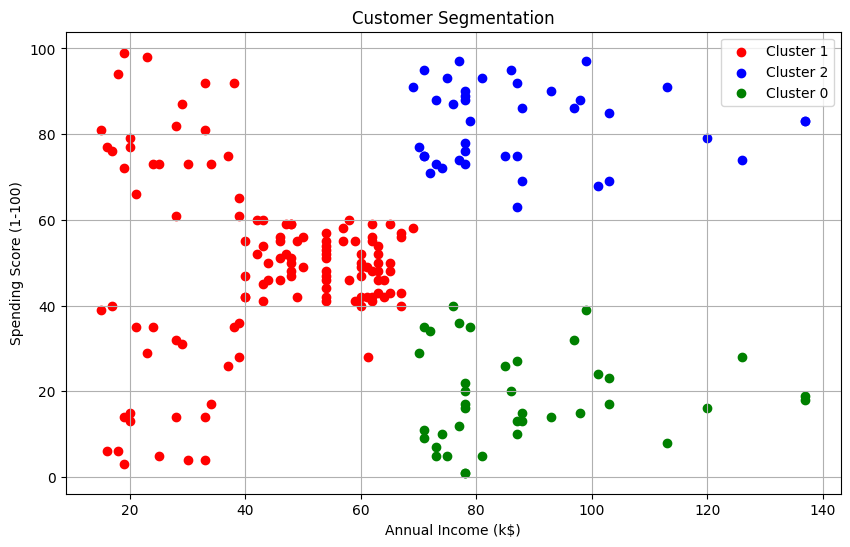

In [29]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for cluslab, col in zip(dt['Cluster'].unique(), colors):
    clusterdt = dt[dt['Cluster'] == cluslab]
    plt.scatter(clusterdt['Annual Income (k$)'], clusterdt['Spending Score (1-100)'],
                color=col, label=f'Cluster {cluslab}')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()